In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

projects = pd.read_csv('opendata_projects000.gz', escapechar='\\', names=['_projectid', '_teacher_acctid', '_schoolid', 'school_ncesid', 'school_latitude', 'school_longitude', 'school_city', 'school_state', 'school_zip', 'school_metro', 'school_district', 'school_county', 'school_charter', 'school_magnet', 'school_year_round', 'school_nlns', 'school_kipp', 'school_charter_ready_promise', 'teacher_prefix', 'teacher_teach_for_america', 'teacher_ny_teaching_fellow', 'primary_focus_subject', 'primary_focus_area' ,'secondary_focus_subject', 'secondary_focus_area', 'resource_type', 'poverty_level', 'grade_level', 'vendor_shipping_charges', 'sales_tax', 'payment_processing_charges', 'fulfillment_labor_materials', 'total_price_excluding_optional_support', 'total_price_including_optional_support', 'students_reached', 'total_donations', 'num_donors', 'eligible_double_your_impact_match', 'eligible_almost_home_match', 'funding_status', 'date_posted', 'date_completed', 'date_thank_you_packet_mailed', 'date_expiration'])

In [4]:
essays_noindex = pd.read_csv('opendata_essays000.gz', escapechar='\\', names=['_projectid', '_teacherid', 'title', 'short_description', 'need_statement', 'essay', 'thankyou_note', 'impact_letter'])

In [6]:
#add a feature"length" indicating length of essays
essays_noindex ['length']= essays_noindex ['essay'].str.len()

In [9]:
#drop columns from esaays_noidex
essays_drop=essays_noindex.drop(['title','short_description','need_statement','essay','thankyou_note','impact_letter'],axis=1)

In [11]:
def DropProjectsColumns(DataFrame):
    DataFrame=DataFrame.drop(['_teacher_acctid','_schoolid','school_latitude','school_ncesid','school_latitude','school_longitude',
              'school_city','school_zip','school_district', 'school_county','school_charter','school_magnet',
               'school_year_round','school_nlns','school_kipp','school_charter_ready_promise','teacher_prefix',
               'teacher_ny_teaching_fellow','primary_focus_subject','secondary_focus_subject','secondary_focus_area','vendor_shipping_charges',
             'sales_tax','payment_processing_charges','fulfillment_labor_materials','total_price_excluding_optional_support',
             'eligible_double_your_impact_match','eligible_almost_home_match','date_completed','date_thank_you_packet_mailed',
           'total_donations','num_donors'], axis = 1)
    return DataFrame
#we did not drop "_projectid" column because we need it for merging with essays data.

In [12]:
#drop drop columns
projects_drop=DropProjectsColumns(projects)

In [13]:
total = pd.merge(essays_drop, projects_drop, how = 'inner', on = ['_projectid'])

In [6]:
#drop missing values
projects_dropna=projects_drop.dropna()

In [15]:
#convert date_posted and date_expiration to DatetimeIndex type so we can calculate the duration between two dates 
from datetime import datetime
times_post = pd.DatetimeIndex(total.date_posted)
total['date_posted']=times_post
times_expiration = pd.DatetimeIndex(total.date_expiration)
total['date_expiration']=times_expiration

In [19]:
#add a "duration" feature indicating the time period between date posted and date expired
total['duration']=total['date_expiration']-total['date_posted']

In [113]:
total_dropna=total.dropna()

In [114]:
total_dropna.head()

,_projectid,_teacherid,length,school_state,school_metro,teacher_teach_for_america,primary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,funding_status,date_posted,date_expiration,duration
0,0000023f507999464aa2b78875b7e5d6,5ac258059d9c4fc4db5c1a92b7204db0,2315.0,LA,urban,t,Math & Science,Supplies,highest poverty,Grades 9-12,174.09,90.0,completed,2010-08-02,2010-11-28,118 days
1,000009891526c0ade7180f8423792063,6d5b22d39e68c656071a842732c63a0c,1285.0,UT,suburban,f,Music & The Arts,Other,moderate poverty,Grades 6-8,529.68,250.0,completed,2016-05-13,2016-09-12,122 days
2,00000ce845c00cbf0686c992fc369df4,1083172499055a6c9f3bb3013ba7742b,1063.0,NY,urban,t,Literacy & Language,Technology,highest poverty,Grades 6-8,710.07,100.0,completed,2013-02-02,2013-03-01,27 days
4,000036e22c5de48109e867c03181cf16,1f995665c38ad223731a6697786c1595,1595.0,AL,urban,f,Math & Science,Supplies,highest poverty,Grades PreK-2,904.92,18.0,live,2016-08-03,2016-12-01,120 days
5,00005f52c98eeaf92b2414a352b023a4,d157730073941bdd851eac950f3154e6,1859.0,CO,urban,f,Literacy & Language,Technology,high poverty,Grades 6-8,597.31,110.0,completed,2012-05-10,2012-10-07,150 days


In [116]:
#delete projects that are still live

total_noLive = total_dropna[total_dropna['funding_status'] != 'live']

In [117]:
#convert reallocated to expired
total_noLive['funding_status'] = total_noLive['funding_status'].replace(to_replace = 'reallocated', value = 'expired')

/Users/yiranxu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [118]:
total_noLive.head()

,_projectid,_teacherid,length,school_state,school_metro,teacher_teach_for_america,primary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,funding_status,date_posted,date_expiration,duration
0,0000023f507999464aa2b78875b7e5d6,5ac258059d9c4fc4db5c1a92b7204db0,2315.0,LA,urban,t,Math & Science,Supplies,highest poverty,Grades 9-12,174.09,90.0,completed,2010-08-02,2010-11-28,118 days
1,000009891526c0ade7180f8423792063,6d5b22d39e68c656071a842732c63a0c,1285.0,UT,suburban,f,Music & The Arts,Other,moderate poverty,Grades 6-8,529.68,250.0,completed,2016-05-13,2016-09-12,122 days
2,00000ce845c00cbf0686c992fc369df4,1083172499055a6c9f3bb3013ba7742b,1063.0,NY,urban,t,Literacy & Language,Technology,highest poverty,Grades 6-8,710.07,100.0,completed,2013-02-02,2013-03-01,27 days
5,00005f52c98eeaf92b2414a352b023a4,d157730073941bdd851eac950f3154e6,1859.0,CO,urban,f,Literacy & Language,Technology,high poverty,Grades 6-8,597.31,110.0,completed,2012-05-10,2012-10-07,150 days
6,0000702ee4cefdb1e7f89084e50d3c85,99750d531ec31b0e600a38e16ebd3a95,1489.0,IL,urban,f,Math & Science,Technology,highest poverty,Grades 6-8,729.43,130.0,completed,2010-06-24,2010-11-21,150 days


In [133]:
#convert categorical data to numeric represenation
def convert(DataFrame):
    for i in range(len(DataFrame.columns)): 
        if(DataFrame[DataFrame.columns[i]].dtype=='O'):
            DataFrame[DataFrame.columns[i]]=DataFrame[DataFrame.columns[i]].astype('category')
            length=len(DataFrame[DataFrame.columns[i]].unique())
            DataFrame[DataFrame.columns[i]]=DataFrame[DataFrame.columns[i]].cat.rename_categories([j for j in range(length)])
    return DataFrame

In [134]:
#Convert total_noLive so that we can later fit decisiontreeclassifier function from skikit learn
#for col in p_noLive:
    #print(p_noLive[col].unique())
total_noLive=convert(total_noLive)

/Users/yiranxu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yiranxu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [136]:
#convert "duration" feature from DateTimeIndex type to float
total_noLive['duration']=pd.Series(pd.to_timedelta(total['date_expiration'].values - total['date_posted'].values).days)

/Users/yiranxu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [137]:
#drop date, projectid, teacher id
total_noLive1=total_noLive.drop(['date_expiration','date_posted','_projectid','_teacherid'],axis=1)

In [140]:
total_noLive1.head()
for col in total_noLive1:
    print(total_noLive1[col].unique())

[ 2315.  1285.  1063. ...,  3836.  4210.   412.]
[18, 44, 34, 5, 14, ..., 25, 8, 28, 46, 50]
Length: 51
Categories (51, int64): [18, 44, 34, 5, ..., 8, 28, 46, 50]
[2, 1, 0]
Categories (3, int64): [2, 1, 0]
[1, 0]
Categories (2, int64): [1, 0]
[4, 5, 3, 0, 6, 2, 1]
Categories (7, int64): [4, 5, 3, 0, 6, 2, 1]
[2, 1, 3, 0, 5, 4]
Categories (6, int64): [2, 1, 3, 0, 5, 4]
[1, 3, 0, 2]
Categories (4, int64): [1, 3, 0, 2]
[2, 1, 3, 0]
Categories (4, int64): [2, 1, 3, 0]
[  174.09   529.68   710.07 ...,  2259.15   770.74  3801.69]
[   90.   250.   100. ...,  2010.   818.  1060.]
[0, 1]
Categories (2, int64): [0, 1]
[  118.   122.    27. ...,  1418.  1342.  1217.]


In [127]:
#test
#import random
#a = np.random.randint(0,len(p_noLive),size = 100000)
#projects1 = projects[:30]
#p_noLive1 = p_noLive.iloc[a,:]


In [71]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import pydotplus

from io import StringIO
%matplotlib inline

In [143]:
from sklearn.cross_validation import train_test_split

#p_noLive_train, p_noLive_test = train_test_split(p_noLive, test_size = 0.2)
total_noLive1_train, total_noLive1_test = train_test_split(total_noLive1, test_size = 0.2)

In [144]:
#Train decision tree model
dt = DecisionTreeClassifier(criterion='entropy')
predictor_var=['school_state', 'school_metro', 'teacher_teach_for_america',
       'primary_focus_area', 'resource_type', 'poverty_level',
       'grade_level', 'total_price_including_optional_support',
       'students_reached','length','duration']
tree1=dt.fit(total_noLive1_train[predictor_var],total_noLive1_train['funding_status'])

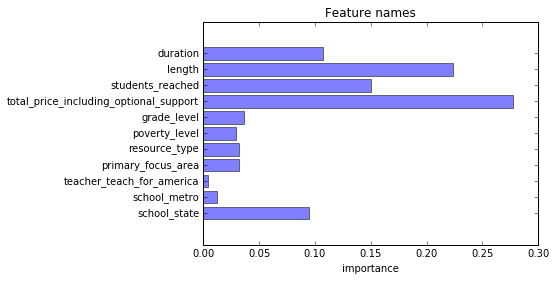

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline
importances=tree1.feature_importances_
y_pos = np.arange(len(predictor_var))

plt.barh(y_pos, importances, align='center', alpha=0.5)
plt.yticks(y_pos, predictor_var)
plt.xlabel('importance')
plt.title('Feature names')
 
plt.show() 

In [146]:
importances

array([ 0.09497061,  0.01210165,  0.00436112,  0.03222507,  0.03240754,
        0.0292883 ,  0.03607251,  0.27752225,  0.150288  ,  0.22373683,
        0.10702612])

In [147]:
#accuracy score of trainig set
tree1.score(total_noLive1_train[predictor_var],total_noLive1_train['funding_status'])

0.99994402038155705

In [148]:
#accuracy score of test set
tree1.score(total_noLive1_test[predictor_var],total_noLive1_test['funding_status'])

0.63375396833295183

In [150]:
roc_auc_score(total_noLive1_test['funding_status'], tree1.predict_proba(total_noLive1_test.drop('funding_status', 1))[:,1])

0.50729850779537089

In [160]:
#find optimal split/leaves for decision tree
min_samples_split_values = list(range(100,3000,500))  #2000,2000
#min_samples_split_values
min_samples_leaf_values = list(range(100,3000,500))

In [159]:
#to be deleted
list(range(100,3000,500))

[100, 600, 1100, 1600, 2100, 2600]

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score
# Code here
def testTrees(X_train, y_train, X_test, y_test, split, leaf, auc):
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = leaf, min_samples_split = split)
    clf = clf.fit(X_train, y_train)
    if (auc==0):
        cm = confusion_matrix(clf.predict(X_test), y_test)
        return (cm[0][0] + cm[1][1]) / float(sum(cm))
    else:
        return roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

In [161]:
lab = 'funding_status'

splits = min_samples_split_values
leaves = min_samples_leaf_values

#Run all of the options
run=1
if (run == 1):
    #Initialize dictionary of results
    res = dict()
    for d in splits:
        res[d] = list()

    #Now train and get results for each option
    for d in splits:
        for l in leaves:
            res[d].append(testTrees(total_noLive1_train.drop(lab, 1), total_noLive1_train[lab], total_noLive1_test.drop(lab, 1), total_noLive1_test[lab], d, l, 1))
            

In [162]:
res

{100: [0.68006702430152244,
  0.68959830442853298,
  0.68777402832877366,
  0.68724955347135919,
  0.68625310959192021,
  0.68532624170006107],
 600: [0.68794232139857558,
  0.68959830442853298,
  0.68777402832877366,
  0.68724955347135919,
  0.68625310959192021,
  0.68532624170006107],
 1100: [0.69069049559143592,
  0.68959830442853298,
  0.68777402832877366,
  0.68724955347135919,
  0.68625310959192021,
  0.68532624170006107],
 1600: [0.69125662387912057,
  0.68974920893497615,
  0.68777402832877366,
  0.68724955347135919,
  0.68625310959192021,
  0.68532624170006107],
 2100: [0.69116908871779081,
  0.68950004786078534,
  0.68777402832877366,
  0.68724955347135919,
  0.68625310959192021,
  0.68532624170006107],
 2600: [0.69060889159524885,
  0.68916948011982049,
  0.68778526595083644,
  0.68724955347135919,
  0.68625310959192021,
  0.68532624170006107]}

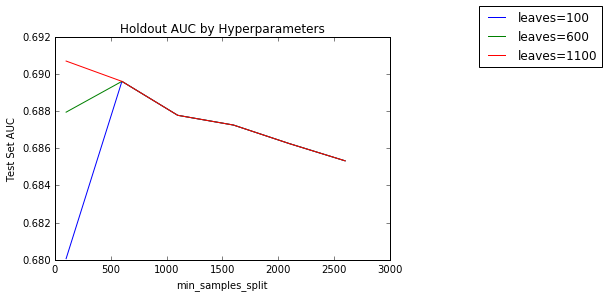

In [163]:
#Plot AUC as a measure of accuracy          
fig = plt.figure()
ax=fig.add_subplot(111)
#b=np.arange(0,10) #
b=np.arange(0,3)
#colors=['b','g','r','c','m','y','k','pink','violet','orange']
colors=['b','g','r']
for l,i in zip(b,range(len(colors))):
    plt.plot(splits,res[splits[i]], colors[l], label = 'leaves={}'.format(leaves[i]))
#label = 'leaves={}'.format(leaves[i]  
                 #colors[l]
plt.legend(bbox_to_anchor=(1.25, 1),loc = 6)
ax.set_xlabel('min_samples_split')
ax.set_ylabel('Test Set AUC')
plt.title('Holdout AUC by Hyperparameters')